### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

Il programma simula un modello di Ising in 1 dimensione campionando lo spazio delle possibili configurazioni del sistema con due possibili algoritmi: il Metropolis o il campionamento alla Gibbs.

Il programma riceve dalla riga di comando con cui viene eseguito tutte le variabili fisiche e utili alla simulazione di cui ha bisogno secondo l'ordine:
<center>*./Monte_Carlo_ISING_1D.exe  Restart(0 or 1) Metropolis(0 or 1) Temperature J h BlockNumber StepNumber*</center>
La simulazione salva i valori ottenuti facendo il data blocking delle varibili richieste:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

nella cartella *Exercise6.1/code/risultati* in file nominati *DataBlockin_osservable_name.dat*. Se si vuole osservare l'andamento di una delle variabili in funzione del numero di blocchi utilizzati per stimarne il valore si esegua il programma con la riga di comando appena riportata e si apra il jupyter-notebook *Exercise6.1_montecarlo_step.ipynb*. 

I grafici riportati qui sotto invece si ottengono implementando un programma in python che esegue diverse simulazioni al variare della temperatura in un range tra 0.5 e 3 e del metodo di campionamento utilizzato (Metropolis o Gibbs). Dai grafici osserviamo l'accordo molto stretto tra i dati ottenuti dalle simulazioni (con entrambi i metodi di campionamento) e le curve teoriche che si ottengono dalle soluzioni analitiche del modello di Ising 1D.

NB: gli script di python sono due a seconda che si voglia simulare il sistema con il campo magnetico magnetico esterno h=0.02 oppure senza. Per far girare gli script basta digitare il comando *make esegui_h_0.0* per simulamulare il stistema con h=0, oppure *make_esegui_h_0.02* per il caso con h=0.02. I risultati di queste simulazionini sono salvati nella cartella *Exercise6.1/code/risultati/h_0.0* o *Exercise6.1/code/risultati/h_0.02*.

I grafici riportati in seguito sono stati ottenuti con i parametri:
- J=1 (Exchange interaction)
- h=0 (External field)
- n_block=20
- n_step=1000

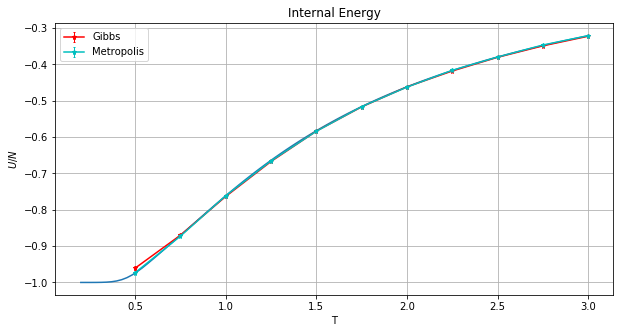

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 5))

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)

num_lines = sum(1 for line in open('./code/risultati/h_0.0/temp_ene.dat'))
num_lines = int(num_lines / 2)

temp, energy, error = np.loadtxt("./code/risultati/h_0.0/temp_ene.dat", usecols=(0,1,2), delimiter='	', unpack='true', max_rows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='r*-', elinewidth=1, capsize=1, ms=5, label="Gibbs")

temp, energy, error = np.loadtxt("./code/risultati/h_0.0/temp_ene.dat", usecols=(0,1,2), delimiter='	', unpack='true', skiprows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='c*-', elinewidth=1, capsize=1, ms=5, label="Metropolis")

plt.title('Internal Energy')
plt.xlabel('T')
plt.ylabel(r'$U/N$')
plt.legend()
plt.grid(True)

plt.show()

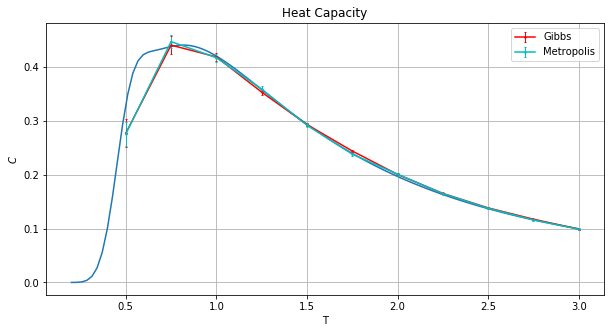

In [31]:
fig=plt.figure(figsize=(10, 5))

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)

temp, energy, error = np.loadtxt("./code/risultati/h_0.0/temp_heat.dat", usecols=(0,1,2), delimiter='	', unpack='true', max_rows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='r.-', elinewidth=1, capsize=1, ms=3, label="Gibbs")

temp, energy, error = np.loadtxt("./code/risultati/h_0.0/temp_heat.dat", usecols=(0,1,2), delimiter='	', unpack='true', skiprows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='c.-', elinewidth=1, capsize=1, ms=3, label="Metropolis")

plt.title('Heat Capacity')
plt.xlabel('T')
plt.ylabel(r'$C$')
plt.legend()
plt.grid(True)

plt.show()

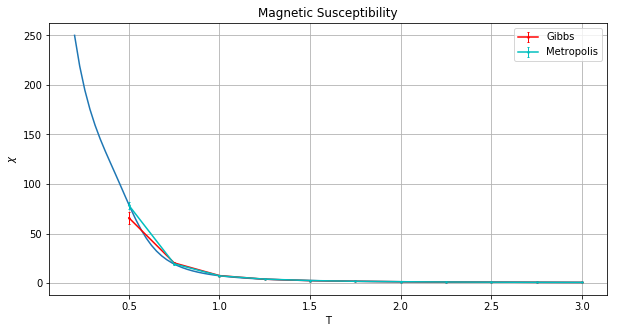

In [32]:
fig=plt.figure(figsize=(10, 5))

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T,X)

temp, energy, error = np.loadtxt("./code/risultati/h_0.0/temp_susce.dat", usecols=(0,1,2), delimiter='	', unpack='true', max_rows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='r.-', elinewidth=1, capsize=1, ms=3, label="Gibbs")

temp, energy, error = np.loadtxt("./code/risultati/h_0.0/temp_susce.dat", usecols=(0,1,2), delimiter='	', unpack='true', skiprows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='c.-', elinewidth=1, capsize=1, ms=3, label="Metropolis")

plt.title('Magnetic Susceptibility')
plt.xlabel('T')
plt.ylabel(r'$\chi$')
plt.legend()
plt.grid(True)

plt.show()

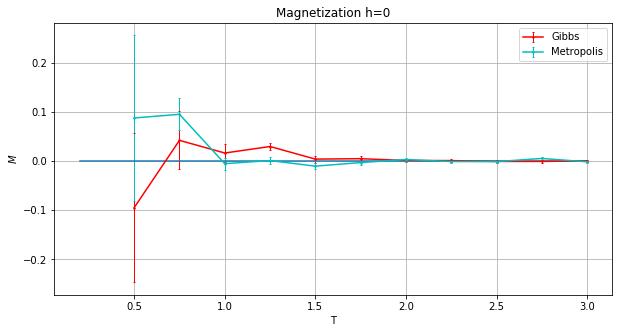

In [33]:
fig=plt.figure(figsize=(10, 5))

M=[0]*100
plt.plot(T,M )

temp, energy, error = np.loadtxt("./code/risultati/h_0.0/temp_magn.dat", usecols=(0,1,2), delimiter='	', unpack='true', max_rows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='r.-', elinewidth=1, capsize=1, ms=3, label="Gibbs")

temp, energy, error = np.loadtxt("./code/risultati/h_0.0/temp_magn.dat", usecols=(0,1,2), delimiter='	', unpack='true', skiprows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='c.-', elinewidth=1, capsize=1, ms=3, label="Metropolis")

plt.title('Magnetization h=0')
plt.xlabel('T')
plt.ylabel(r'$M$')
plt.legend()
plt.grid(True)

plt.show()

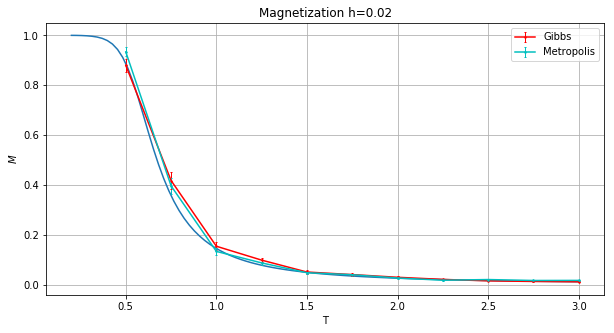

In [34]:
fig=plt.figure(figsize=(10, 5))

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T,M )

temp, energy, error = np.loadtxt("./code/risultati/h_0.02/temp_magn.dat", usecols=(0,1,2), delimiter='	', unpack='true', max_rows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='r.-', elinewidth=1, capsize=1, ms=3, label="Gibbs")

temp, energy, error = np.loadtxt("./code/risultati/h_0.02/temp_magn.dat", usecols=(0,1,2), delimiter='	', unpack='true', skiprows=num_lines)
plt.errorbar(temp, energy, yerr=error, errorevery=1, fmt='c.-', elinewidth=1, capsize=1, ms=3, label="Metropolis")

plt.title('Magnetization h=0.02')
plt.xlabel('T')
plt.ylabel(r'$M$')
plt.legend()
plt.grid(True)

plt.show()